reading the file

In [26]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Define the full path to the CSV file
file_path = r'C:\Users\Admin\Documents\MD_agric_exam-4313\MD_agric_exam-4313.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


Write code to determine the number of unique crop types in the dataset?

In [29]:
num_of_unique_crops = df['Crop_type'].nunique()

# Print the result
print("Number of unique crop types:", num_of_unique_crops)

Number of unique crop types: 8


Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places).

In [34]:
# Find the maximum yield of the crop type 'Wheat'
max_wheat_yield = df[df['Crop_type'] == 'wheat']['Annual_yield'].max()

# Print the maximum yield of 'Wheat'
print("Maximum Yield of Wheat:", max_wheat_yield)

Maximum Yield of Wheat: 8.994376295629458


Find the total rainfall for crop types where the average pollution level is above 0.2.

In [35]:
# Calculate average pollution level for each crop type
average_pollution = df.groupby('Crop_type')['Pollution_level'].mean()

# Filter crop types where average pollution level is above 0.2
filtered_crop_types = average_pollution[average_pollution > 0.2].index.tolist()

# Calculate total rainfall for filtered crop types
total_rainfall = df[df['Crop_type'].isin(filtered_crop_types)]['Rainfall'].sum()

# Print the total rainfall
print("Total Rainfall for crop types with average pollution level > 0.2:", total_rainfall)

Total Rainfall for crop types with average pollution level > 0.2: 941959.7


Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [36]:
def calculate_temperature_range(field_id):
    # Filter the DataFrame for the given Field_ID
    field_data = df[df['Field_ID'] == field_id]
    
    # Calculate temperature range for the field
    temperature_range = field_data['Max_temperature_C'].max() - field_data['Min_temperature_C'].min()
    
    return temperature_range
    
   # Call the function with Field_IDs 1458, 1895, and 5443
field_1458_range = calculate_temperature_range(1458)
field_1895_range = calculate_temperature_range(1895)
field_5443_range = calculate_temperature_range(5443)

# Print the results
print("Temperature range for Field_ID 1458:", field_1458_range)
print("Temperature range for Field_ID 1895:", field_1895_range)
print("Temperature range for Field_ID 5443:", field_5443_range)

Temperature range for Field_ID 1458: 40.7
Temperature range for Field_ID 1895: 35.7
Temperature range for Field_ID 5443: 33.4


Write code to calculate the total plot size for plots where the pH is less than 5.5.

In [38]:
total_plot_size = df[df['pH'] < 5.5]['Plot_size'].sum()

# Print the total plot size for pH < 5.5
print("Total Plot Size for pH < 5.5:", total_plot_size)

Total Plot Size for pH < 5.5: 1731.8999999999999


Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

In [39]:
filtered_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

# Get the number of rows in the filtered DataFrame
num_rows_filtered = filtered_df.shape[0]

# Print the number of rows in the filtered dataset
print("Number of rows in the filtered dataset:", num_rows_filtered)

# Optionally, you can print the filtered DataFrame
print("\nFiltered DataFrame:")
print(filtered_df)

Number of rows in the filtered dataset: 319

Filtered DataFrame:
     Field_ID  Elevation  Rainfall  Min_temperature_C  Max_temperature_C  \
0        1162  494.95615    1507.6               -5.4               31.0   
2        3504  396.87990    1715.1               -6.1               31.7   
5        2274  270.45100    1665.2               -7.2               34.3   
13       4807  520.29770     292.3               -6.3               32.9   
14        973  432.03570    1464.4               -6.0               30.2   
..        ...        ...       ...                ...                ...   
990      1637  504.66306    1144.5               -5.7               32.1   
991       756  578.91270     889.4               -5.2               31.0   
992      1332  359.76013    1816.0               -6.4               32.9   
995      2202  572.95935     625.6               -5.5               31.0   
996      2531  552.80945     398.1               -5.9               33.4   

           pH  Polluti

In [41]:
median_plot_size = df['Plot_size'].median()

# Filter rows where Plot_Size is larger than the median plot size
filtered_df = df[df['Plot_size'] > median_plot_size]

# Calculate the standard deviation of 'Rainfall' for filtered rows
std_dev_rainfall = np.std(filtered_df['Rainfall'])

# Round to 2 decimal places
std_dev_rainfall_rounded = round(std_dev_rainfall, 2)

# Print the standard deviation of Rainfall for plots with Plot_Size > median plot size
print("Standard Deviation of Rainfall for Plot_Size > Median Plot Size:", std_dev_rainfall_rounded)

Standard Deviation of Rainfall for Plot_Size > Median Plot Size: 469.62


In [42]:
# Find the most common Max_temperature_C (mode)
mode_max_temp = df['Max_temperature_C'].mode()[0]  # Use [0] to get the first mode if multiple

# Find the least common Crop_type
least_common_crop_type = df['Crop_type'].value_counts().idxmin()

# Extract first three digits of the mode Max_temperature_C
first_three_digits = str(mode_max_temp)[:3]

# Extract last three letters of the least common Crop_type
last_three_letters = least_common_crop_type[-3:]

# Concatenate the strings
result_string = first_three_digits + last_three_letters

# Print the result
print("Concatenated String:", result_string)

Concatenated String: 30.ice


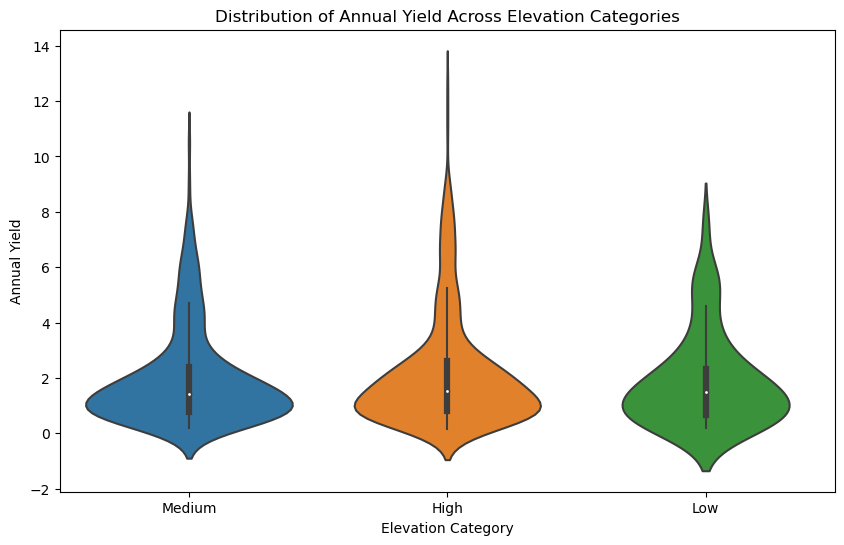

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the full path to the CSV file
file_path = r'C:\Users\Admin\Documents\MD_agric_exam-4313\MD_agric_exam-4313.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Define the elevation ranges
def categorize_elevation(Elevation):
    if Elevation < 300:
        return 'Low'
    elif 300 <= Elevation <= 600:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization to create a new column 'Elevation_Category'
df['Elevation_Category'] = df['Elevation'].apply(categorize_elevation)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=df)
plt.title('Distribution of Annual Yield Across Elevation Categories')
plt.xlabel('Elevation Category')
plt.ylabel('Annual Yield')
plt.show()


In [44]:
def sum_crop_type_lengths(df, unique_crop_types, index=0):
    # Base case: if index reaches the length of unique_crop_types list
    if index == len(unique_crop_types):
        return 0
    
    # Get the current crop type
    crop_type = unique_crop_types[index]
    
    # Get the length of the current crop type
    length = len(crop_type)
    
    # Recursive call to sum the lengths for the next crop type
    next_sum = sum_crop_type_lengths(df, unique_crop_types, index + 1)
    
    # If the current crop type exists in the DataFrame, add its length to the sum
    if crop_type in df['Crop_type'].values:
        return length + next_sum
    else:
        return next_sum

# Get unique crop types
unique_crop_types = df['Crop_type'].unique()

# Call the recursive function to sum the integer values for each unique crop type
total_sum = sum_crop_type_lengths(df, unique_crop_types)

# Print the total sum
print("Total sum of integer values for each unique crop type:", total_sum)

Total sum of integer values for each unique crop type: 42


In [45]:
import pandas as pd
from scipy.stats import ttest_ind

# Define the full path to the CSV file
file_path = r'C:\Users\Admin\Documents\MD_agric_exam-4313\MD_agric_exam-4313.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Filter the DataFrame for 'coffee' and 'banana' crop types
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_statistic, p_value = ttest_ind(coffee_yield, banana_yield)

# Print the p-value rounded to three decimal places
print("p-value:", round(p_value, 3))


p-value: 0.598
